# Description

Training the Restrictive Boltzmann Machine

# Imports

In [1]:
from torchvision import datasets, transforms
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from rbm import RestrictiveBM
from dataset import PatternDB
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = "../small_fixed/train"
BATCH_SIZE = 16

In [3]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])



In [4]:
dataset = PatternDB(data_path=DATA_PATH, transform=transform)
train_loader = DataLoader(dataset=dataset, batch_size=BATCH_SIZE, shuffle=True)

# Training RBM

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [6]:
rbm = RestrictiveBM(n_visible=3*64*64, n_hidden=3*32*32)
rbm = rbm.to(device)

In [7]:
rbm.to(device) 

for epoch in range(60):
    total_loss = 0
    
    for data in train_loader:
      
        data = data.to(device)
        
       
        data = data.view(-1, 3*64*64)
        
       
        rbm.contrastive_divergence(data, lr=0.01)
        total_loss += rbm.reconstruction_error(data).item()
    
    
    avg_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1}, Reconstruction Error: {avg_loss}')


Epoch 1, Reconstruction Error: 0.12304382334152858
Epoch 2, Reconstruction Error: 0.12156197706858317
Epoch 3, Reconstruction Error: 0.11904364208380382
Epoch 4, Reconstruction Error: 0.11659829527139663
Epoch 5, Reconstruction Error: 0.11509612282117208
Epoch 6, Reconstruction Error: 0.11390162905057272
Epoch 7, Reconstruction Error: 0.11291910390059154
Epoch 8, Reconstruction Error: 0.112610023021698
Epoch 9, Reconstruction Error: 0.11214082588752111
Epoch 10, Reconstruction Error: 0.11197385201851527
Epoch 11, Reconstruction Error: 0.11198686838150024
Epoch 12, Reconstruction Error: 0.11238897244135539
Epoch 13, Reconstruction Error: 0.1125751609603564
Epoch 14, Reconstruction Error: 0.11250294854243596
Epoch 15, Reconstruction Error: 0.11267634560664495
Epoch 16, Reconstruction Error: 0.11305621604124705
Epoch 17, Reconstruction Error: 0.11326801697413126
Epoch 18, Reconstruction Error: 0.11350629011789957
Epoch 19, Reconstruction Error: 0.11364393045504888
Epoch 20, Reconstruction

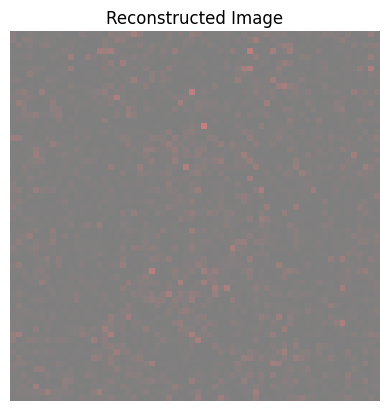

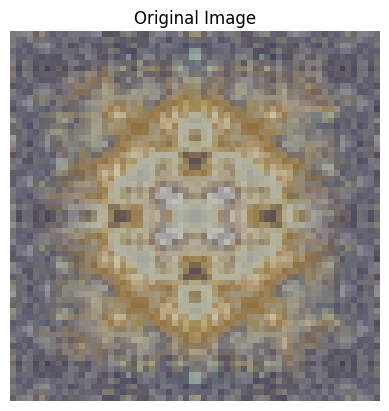

In [17]:



data_iter = iter(train_loader)
data = next(data_iter) 
data = data.to(device)
data_flattened = data.view(-1, 3 * 64 * 64)


_, h_sample = rbm.sample_h(data_flattened)  
v_prob, _ = rbm.sample_v(h_sample)         


reconstructed = v_prob.view(-1, 3, 64, 64) 
reconstructed = reconstructed * 0.5 + 0.5  


reconstructed_np = reconstructed[0].cpu().detach().numpy().transpose(1, 2, 0)


plt.imshow(reconstructed_np)
plt.title("Reconstructed Image")
plt.axis("off")
plt.show()


original = data[0] * 0.5 + 0.5 
original_np = original.cpu().detach().numpy().transpose(1, 2, 0)

plt.imshow(original_np)
plt.title("Original Image")
plt.axis("off")
plt.show()
